In [1]:
import pandas as pd

In [2]:
import sys
sys.path.append('C:\\Users\\deghe\\Documents\\Ironhack\\Week_5\\Mid_bootcamp_project\\mid_project\\src')

In [3]:
from functions import *

In [4]:
# We read the raw data into a dataframe. We use the separator ";" in order to be able to properly separate the columns
marketing_df=pd.read_csv("C:\\Users\\deghe\\Documents\\Ironhack\\Week_5\\Mid_bootcamp_project\\mid_project\\data\\raw\\marketing_campaign_dataset.csv")

In [5]:
marketing_df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [6]:
# We check the shape of the dataframe
print(f"The marketing dataframe contains {marketing_df.shape[0]} rows and {marketing_df.shape[1]} columns.")

The marketing dataframe contains 200000 rows and 16 columns.


In [7]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [8]:
# Checking at the data we can see some incorrect data, taken into account the content of specific columns.We comment them below:
# Acquisition cost should be float type
# ROI: should be float type
# Date: should be datetime format
# Duration could then considered as a numeric value, but we will leave it as an attribute for now to be able to plot and get that level of granularity

# We will proceed below to clean the data types with functions, when possible or reasonable.

In [9]:
# First thing we will do is to clean the headers and convert them into snake_case, which will ease then later the manipulation. We will use a function
# called lowercase_headers_and_replace_spaces() from our functions module

In [10]:
marketing_df=lowercase_headers_and_replace_spaces(marketing_df)
display(marketing_df.columns)

Index(['campaign_id', 'company', 'campaign_type', 'target_audience',
       'duration', 'channel_used', 'conversion_rate', 'acquisition_cost',
       'roi', 'location', 'language', 'clicks', 'impressions',
       'engagement_score', 'customer_segment', 'date'],
      dtype='object')

In [11]:
# Being something punctual we will convert it with the str.replace method, rather than passing it into a function this time, as it may not be very useful in the future.
marketing_df['acquisition_cost'] = marketing_df['acquisition_cost'].str.replace('$', '').str.replace(',', '.').str.replace('.00', '')
marketing_df.head()

,campaign_id,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment,date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16.174,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11.566,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10.200,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12.724,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16.452,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [12]:
# In order to speed up future data conversions, we pass a function to be able to convert a list of columns to numeric
def columns_to_numeric(df:pd.DataFrame,cols:list)->pd.DataFrame:
    ''' 
    This columns takes a list of columns from a DataFrame and converts them into numeric.
    Input:
    
    df: dataframe we want to clean
    cols: list of columns we want to convert to numeric.

    Output:
    colums properly formatted to numeric.
    '''
    
    df2 = df.copy()

    # we interate over the list of columns we want to convert into numeric
    for col in cols:
        df2[col] = pd.to_numeric(df2[col], errors='coerce')

    return df2

    

In [13]:
marketing_df=columns_to_numeric(marketing_df,["acquisition_cost","roi"])

In [14]:
print(marketing_df.dtypes)

campaign_id           int64
company              object
campaign_type        object
target_audience      object
duration             object
channel_used         object
conversion_rate     float64
acquisition_cost    float64
roi                 float64
location             object
language             object
clicks                int64
impressions           int64
engagement_score      int64
customer_segment     object
date                 object
dtype: object


In [15]:
# We next convert the date into date format. I thought about doing it with the next function of extracting mont, quarter, etc., but we should avoid performing multiple actions into 1 column to make it more generic

In [16]:
marketing_df["date"]=pd.to_datetime(marketing_df['date'])

In [17]:
# We will create a function to extract the day as day of the week, month, quarter and week of the year. This should help us analyse the seasonality

def date_extract(df:pd.DataFrame,col:"string")->pd.DataFrame:
    '''
    This function takes a DataFrame and extracts the month, quarter and week of the year into new columns

    Input:

    df: The dataframe we want to apply the changes on
    col: The date column we want to extract the month, quarter, week of the year into new colums from

    Output:

    it returns the dataframe with the new 3 columns
    '''
    # We create a copy of our df and extract the corresponding values from the date colum inserted as an input:
    df2=df.copy()
    df2["month"] = df2[col].dt.month
    df2["quarter"] =  df2[col].dt.quarter
    df2["week_of_year"]= df2[col].dt.isocalendar().week

    return df2



In [18]:
marketing_df = date_extract(marketing_df,"date")

In [19]:
marketing_df.head()

,campaign_id,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment,date,month,quarter,week_of_year
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16.174,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,1,1,53
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11.566,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,1,1,53
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10.200,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,1,1,53
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12.724,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,1,1,1
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16.452,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,1,1,1


In [20]:
display(marketing_df.dtypes)

campaign_id                  int64
company                     object
campaign_type               object
target_audience             object
duration                    object
channel_used                object
conversion_rate            float64
acquisition_cost           float64
roi                        float64
location                    object
language                    object
clicks                       int64
impressions                  int64
engagement_score             int64
customer_segment            object
date                datetime64[ns]
month                        int32
quarter                      int32
week_of_year                UInt32
dtype: object

In [21]:
display(marketing_df["target_audience"].value_counts())

target_audience
Men 18-24      40258
Men 25-34      40023
All Ages       40019
Women 25-34    40013
Women 35-44    39687
Name: count, dtype: int64

In [22]:
# We will split the "demographic" target_audience into 2 columns, provided a specific pattern is present. In this case we will look for digit-digit

import pandas as pd

def extract_pattern(df: pd.DataFrame, col: str, pattern: str, new_col: str) -> pd.DataFrame:
    '''
    This function extracts a pattern from a specified column into a new column.

    Input:
    - df: The DataFrame we want to apply the changes to.
    - col: The column containing the text to search for the pattern.
    - pattern: The regular expression pattern to extract.
    - new_col: The name of the new column to store the extracted patterns.

    Output:
    - Returns the DataFrame with the new column.
    '''
    df2 = df.copy()

    # We use the methode str. to extract the pattern into a new column
    df2[new_col] = df2[col].str.extract(pattern, expand=False)

    # If there are missing values in the original column, fill them in the new column
    df2[new_col].fillna("all ages", inplace=True)

    return df2


In [23]:
marketing_df=extract_pattern(marketing_df,"target_audience", r'(\d{2}-\d{2})',"age_range")

In [24]:
# We check the values of the new age-ranges column
marketing_df["age_range"].value_counts()

age_range
25-34       80036
18-24       40258
all ages    40019
35-44       39687
Name: count, dtype: int64

In [25]:
marketing_df["target_audience"].value_counts()

target_audience
Men 18-24      40258
Men 25-34      40023
All Ages       40019
Women 25-34    40013
Women 35-44    39687
Name: count, dtype: int64

In [26]:
# We now will define a function to clean the remaining target_audience column to only have men, women and all genders

def gender_cleaning(df:pd.DataFrame,col:"string")->pd.DataFrame:
    '''
    This function takes a dataframe as input and returns 3 values for gender, men, women and all genders

    Input: 
    df: dataframe to be modified
    col: name of the column we want to apply the changes on

    Output:

    Returns the dataframe with the 3 options listed above: men, women and all genders.

    '''
    df2=df.copy()
    # Using the lambda function from the data transformation notebook, we adapt the function to the current purpose
    df2 = df.copy()
    df2[col] = df2[col].apply(lambda val: "women" if "women" in str(val).lower() else ("men" if "men" in str(val).lower() else "all genders"))

    return df2

In [27]:
marketing_df= gender_cleaning(marketing_df,"target_audience")

In [28]:
marketing_df["target_audience"].value_counts()

target_audience
men            80281
women          79700
all genders    40019
Name: count, dtype: int64

In [29]:
marketing_df.head()

,campaign_id,company,campaign_type,target_audience,duration,channel_used,conversion_rate,acquisition_cost,roi,location,language,clicks,impressions,engagement_score,customer_segment,date,month,quarter,week_of_year,age_range
0,1,Innovate Industries,Email,men,30 days,Google Ads,0.04,16.174,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,1,1,53,18-24
1,2,NexGen Systems,Email,women,60 days,Google Ads,0.12,11.566,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,1,1,53,35-44
2,3,Alpha Innovations,Influencer,men,30 days,YouTube,0.07,10.200,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,1,1,53,25-34
3,4,DataTech Solutions,Display,all genders,60 days,YouTube,0.11,12.724,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,1,1,1,all ages
4,5,NexGen Systems,Email,men,15 days,YouTube,0.05,16.452,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,1,1,1,25-34


In [30]:
# We check the columns and data types again
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   campaign_id       200000 non-null  int64         
 1   company           200000 non-null  object        
 2   campaign_type     200000 non-null  object        
 3   target_audience   200000 non-null  object        
 4   duration          200000 non-null  object        
 5   channel_used      200000 non-null  object        
 6   conversion_rate   200000 non-null  float64       
 7   acquisition_cost  200000 non-null  float64       
 8   roi               200000 non-null  float64       
 9   location          200000 non-null  object        
 10  language          200000 non-null  object        
 11  clicks            200000 non-null  int64         
 12  impressions       200000 non-null  int64         
 13  engagement_score  200000 non-null  int64         
 14  cust

In [31]:
# We consider the data as clean and save the "cleaned version of the csv into the corresponding folder"

#marketing_df.to_csv('C:/Users/e.sansebastian/OneDrive - EXPONDO/Ironhack/Weeks/Week_5/Mid_bootcamp_project/mid_project/data/cleaned/cleaned_marketing_df.csv',index=False)

In [32]:
#renamed the column target_audience to gender

marketing_df.rename(columns={"target_audience":"gender"},inplace=True)

In [33]:
# since the acquisition cost column likely indicates the daily campaign spend, renamed the column accordingly

marketing_df.rename(columns={"acquisition_cost":"daily_campaign_spend"},inplace=True)

In [34]:
# add a column with calculated CTR

marketing_df["ctr"]=(marketing_df["clicks"]/marketing_df["impressions"]*100).round(1)

In [35]:
# multiplying the conversion rate value by 100 for better readability

marketing_df["conversion_rate"]=marketing_df["conversion_rate"]*100

In [36]:
# calculate the total number of conversions + add column

marketing_df["conversions"]=(marketing_df["impressions"]*marketing_df["conversion_rate"]/100).round().astype(int)
marketing_df.head()

,campaign_id,company,campaign_type,gender,duration,channel_used,conversion_rate,daily_campaign_spend,roi,location,...,impressions,engagement_score,customer_segment,date,month,quarter,week_of_year,age_range,ctr,conversions
0,1,Innovate Industries,Email,men,30 days,Google Ads,4.0,16.174,6.29,Chicago,...,1922,6,Health & Wellness,2021-01-01,1,1,53,18-24,26.3,77
1,2,NexGen Systems,Email,women,60 days,Google Ads,12.0,11.566,5.61,New York,...,7523,7,Fashionistas,2021-01-02,1,1,53,35-44,1.5,903
2,3,Alpha Innovations,Influencer,men,30 days,YouTube,7.0,10.200,7.18,Los Angeles,...,7698,1,Outdoor Adventurers,2021-01-03,1,1,53,25-34,7.6,539
3,4,DataTech Solutions,Display,all genders,60 days,YouTube,11.0,12.724,5.55,Miami,...,1820,7,Health & Wellness,2021-01-04,1,1,1,all ages,11.9,200
4,5,NexGen Systems,Email,men,15 days,YouTube,5.0,16.452,6.50,Los Angeles,...,4201,3,Health & Wellness,2021-01-05,1,1,1,25-34,9.0,210


In [37]:
#CPM calculation + add column

marketing_df["cpm"]=(marketing_df["daily_campaign_spend"]/marketing_df["impressions"]*1000).round(2).astype(float)
marketing_df.head()

,campaign_id,company,campaign_type,gender,duration,channel_used,conversion_rate,daily_campaign_spend,roi,location,...,engagement_score,customer_segment,date,month,quarter,week_of_year,age_range,ctr,conversions,cpm
0,1,Innovate Industries,Email,men,30 days,Google Ads,4.0,16.174,6.29,Chicago,...,6,Health & Wellness,2021-01-01,1,1,53,18-24,26.3,77,8.42
1,2,NexGen Systems,Email,women,60 days,Google Ads,12.0,11.566,5.61,New York,...,7,Fashionistas,2021-01-02,1,1,53,35-44,1.5,903,1.54
2,3,Alpha Innovations,Influencer,men,30 days,YouTube,7.0,10.200,7.18,Los Angeles,...,1,Outdoor Adventurers,2021-01-03,1,1,53,25-34,7.6,539,1.33
3,4,DataTech Solutions,Display,all genders,60 days,YouTube,11.0,12.724,5.55,Miami,...,7,Health & Wellness,2021-01-04,1,1,1,all ages,11.9,200,6.99
4,5,NexGen Systems,Email,men,15 days,YouTube,5.0,16.452,6.50,Los Angeles,...,3,Health & Wellness,2021-01-05,1,1,1,25-34,9.0,210,3.92


In [38]:
# Total revenue and avg. ROI by company

company_revenue_ROI=marketing_df.groupby(['company','month','quarter']).agg({'daily_campaign_spend': 'sum','roi': 'mean'}).reset_index()
company_revenue_ROI.rename(columns={"daily_campaign_spend":"tot_revenue", "roi":"avg_roi"})

,company,month,quarter,tot_revenue,avg_roi
0,Alpha Innovations,1,1,49720.291,5.013189
1,Alpha Innovations,2,1,39487.868,4.929058
2,Alpha Innovations,3,1,46942.566,4.996127
3,Alpha Innovations,4,2,44205.385,4.987488
4,Alpha Innovations,5,2,46388.877,5.074586
5,Alpha Innovations,6,2,44739.788,4.966181
6,Alpha Innovations,7,3,46242.476,5.009487
7,Alpha Innovations,8,3,47396.452,4.995027
8,Alpha Innovations,9,3,45536.134,5.033432
9,Alpha Innovations,10,4,48460.615,5.046074


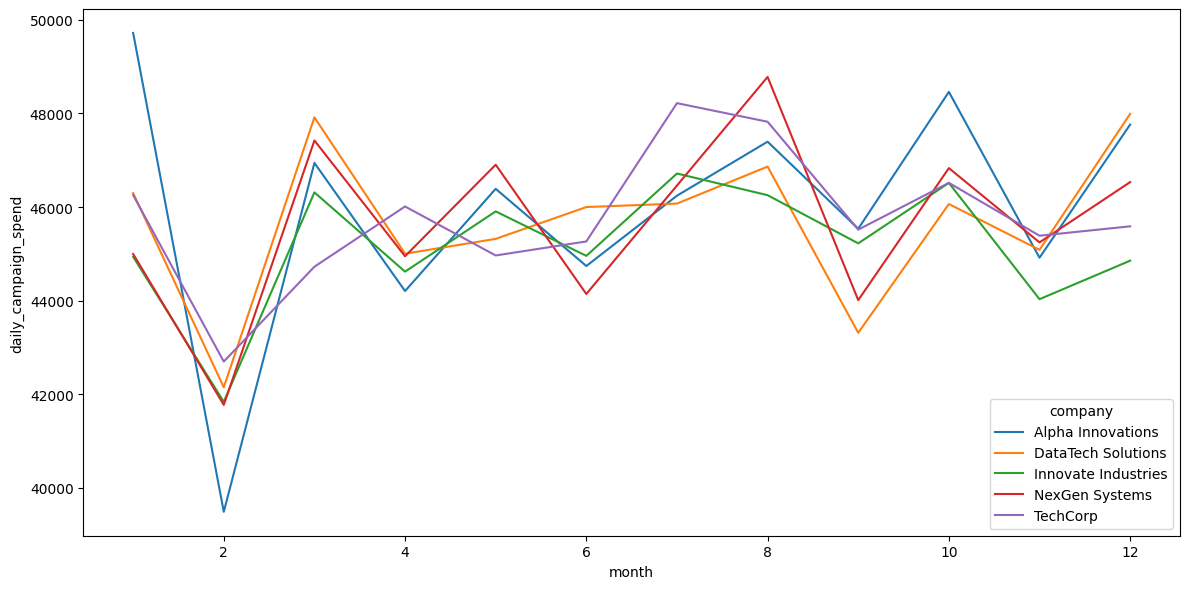

In [39]:
# client spend on monthly basis: our agency's yearly gross profit report

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=company_revenue_ROI, x="month", y="daily_campaign_spend", hue="company", ax=ax)
plt.tight_layout()
plt.show()

# clients tend to run their campaigns in similar volumes, weakest months = may-july, peaking again in August and October (into Q4), Post-January swamp 
# in February is expected due to budget planning - March might be mid-season sales - Alpha innovation spent less at beginning of the year and ramped
# up activities in Q4

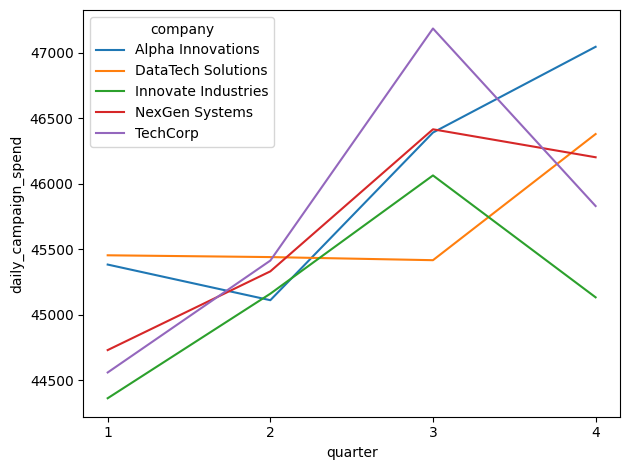

In [40]:
# spend evolution by quarter, same as above but grouped by quarter - KEEP

# shows the ad spends going up in Q3, particularly TechCorp, but also NexGen and Innovate - Alpha innovation and DataTech spend more in Q4

fig, ax = plt.subplots()

ax.set_xticks([1,2,3,4])
sns.lineplot(data=company_revenue_ROI, x="quarter", y="daily_campaign_spend", hue="company", errorbar=None, ax=ax)
plt.tight_layout()
plt.show()

In [41]:
# Total imps and avg. CTR by company

company_imps_ctr=marketing_df.groupby(['company','month','quarter']).agg({'impressions': 'sum','ctr': 'mean'}).reset_index()
company_imps_ctr.rename(columns={"daily_campaign_spend":"tot_imps", "ctr":"avg_ctr"})

,company,month,quarter,impressions,avg_ctr
0,Alpha Innovations,1,1,19202807,13.894872
1,Alpha Innovations,2,1,16589763,14.330741
2,Alpha Innovations,3,1,18562475,14.399180
3,Alpha Innovations,4,2,17776279,13.881483
4,Alpha Innovations,5,2,18894985,14.022885
5,Alpha Innovations,6,2,18187792,13.544489
6,Alpha Innovations,7,3,18489753,14.054770
7,Alpha Innovations,8,3,18635460,13.836740
8,Alpha Innovations,9,3,17880953,14.344662
9,Alpha Innovations,10,4,19088505,13.876901


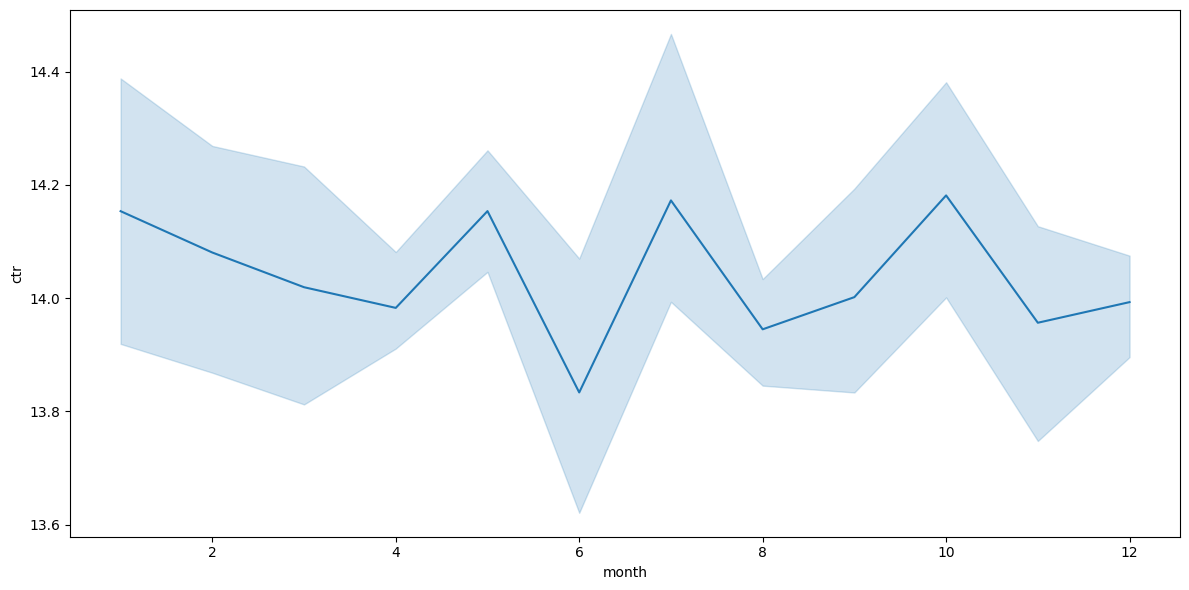

In [42]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=company_imps_ctr, x="month", y="ctr", ax=ax)
plt.tight_layout()
plt.show()

In [43]:
# Total spend and avg. CTR by company

company_spend_ctr=marketing_df.groupby(['company','month','quarter']).agg({'daily_campaign_spend': 'sum','ctr': 'mean'}).reset_index()
company_spend_ctr.rename(columns={"daily_campaign_spend":"tot_spend", "ctr":"avg_ctr"})

,company,month,quarter,tot_spend,avg_ctr
0,Alpha Innovations,1,1,49720.291,13.894872
1,Alpha Innovations,2,1,39487.868,14.330741
2,Alpha Innovations,3,1,46942.566,14.399180
3,Alpha Innovations,4,2,44205.385,13.881483
4,Alpha Innovations,5,2,46388.877,14.022885
5,Alpha Innovations,6,2,44739.788,13.544489
6,Alpha Innovations,7,3,46242.476,14.054770
7,Alpha Innovations,8,3,47396.452,13.836740
8,Alpha Innovations,9,3,45536.134,14.344662
9,Alpha Innovations,10,4,48460.615,13.876901


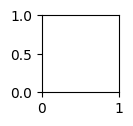

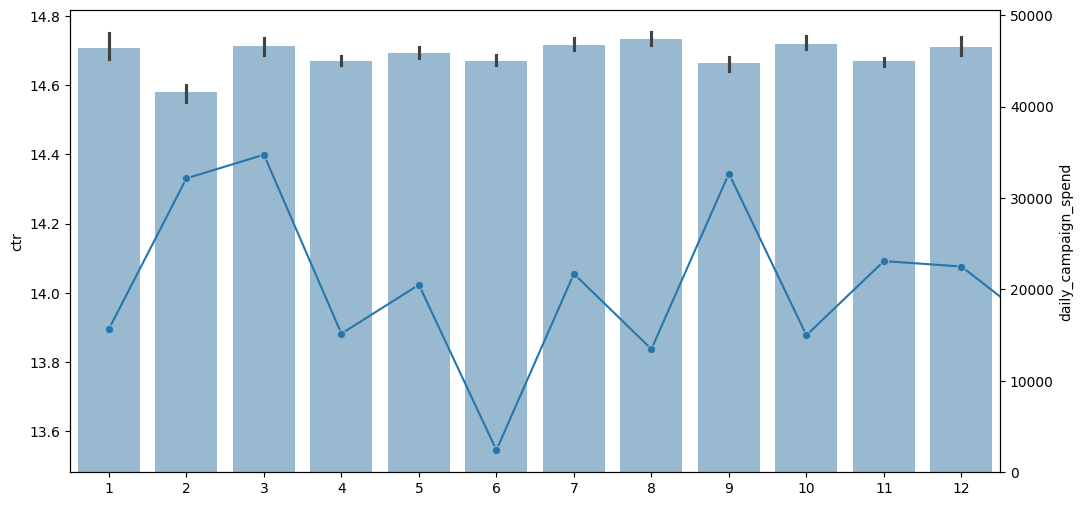

In [44]:
# Campaign spend doesn't affect the CTR but month does? Eg. June vs. September

import matplotlib.pyplot as plt
import matplotlib as mpl


fig, ax = plt.subplots(figsize=(1,1))
mpl.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data = company_spend_ctr["ctr"], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = company_spend_ctr, x='month', y='daily_campaign_spend', alpha=0.5, ax=ax2)
plt.show()

In [45]:
#June and September have similar spends but different avg. CTR - June considerably lower than Sept. Why? 

#Exploring June:

june_df=marketing_df[marketing_df["month"] == 6]
june_df.describe().T

,count,mean,min,25%,50%,75%,max,std
campaign_id,16440.0,99994.0,152.0,50073.0,99994.0,149915.0,199836.0,57742.461117
conversion_rate,16440.0,8.007847,1.0,4.0,8.0,12.0,15.0,4.076613
daily_campaign_spend,16440.0,13.69239,5.01,8.78,12.5815,16.3795,200.0,13.158577
roi,16440.0,4.985203,2.0,3.48,4.99,6.46,8.0,1.727932
clicks,16440.0,550.285706,100.0,326.0,549.0,774.0,1000.0,259.88764
impressions,16440.0,5542.547324,1000.0,3299.0,5577.0,7756.25,10000.0,2582.424281
engagement_score,16440.0,5.503345,1.0,3.0,5.0,8.0,10.0,2.876747
date,16440,2021-06-15 11:59:59.999999744,2021-06-01 00:00:00,2021-06-08 00:00:00,2021-06-15 12:00:00,2021-06-23 00:00:00,2021-06-30 00:00:00,NaN
month,16440.0,6.0,6.0,6.0,6.0,6.0,6.0,0.0
quarter,16440.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0


In [46]:
#June and September have similar spends but different avg. CTR - June considerably lower than Sept. Why? 

#Exploring September:

september_df=marketing_df[marketing_df["month"] == 9]
september_df.describe().T

,count,mean,min,25%,50%,75%,max,std
campaign_id,16440.0,100086.0,244.0,50165.0,100086.0,150007.0,199928.0,57742.461117
conversion_rate,16440.0,8.024331,1.0,5.0,8.0,11.0,15.0,4.032189
daily_campaign_spend,16440.0,13.600988,5.011,8.8,12.651,16.45525,200.0,12.277318
roi,16440.0,5.029044,2.0,3.53,5.03,6.56,8.0,1.742387
clicks,16440.0,551.662409,100.0,324.0,553.0,779.0,1000.0,261.482216
impressions,16440.0,5514.495255,1000.0,3312.0,5515.0,7715.0,10000.0,2579.250409
engagement_score,16440.0,5.535097,1.0,3.0,6.0,8.0,10.0,2.874462
date,16440,2021-09-15 11:59:59.999999744,2021-09-01 00:00:00,2021-09-08 00:00:00,2021-09-15 12:00:00,2021-09-23 00:00:00,2021-09-30 00:00:00,NaN
month,16440.0,9.0,9.0,9.0,9.0,9.0,9.0,0.0
quarter,16440.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0


In [47]:
#comparing june and sept: the gender audience makes a difference, with Women more incline to click. Gender targeted campaigns
# more or less equal in distribution, all-gender targeted campaign around half as much - still 0,5% higher CTR in September.

gender_month = marketing_df[(marketing_df['month'] == 6) | (marketing_df['month'] == 9)].groupby(["gender", "month"]).agg({"ctr": "mean", "campaign_id":"count"}).reset_index()
gender_month

,gender,month,ctr,campaign_id
0,all genders,6,13.549032,3202
1,all genders,9,14.036530,3233
2,men,6,13.791935,6745
3,men,9,13.850472,6562
4,women,6,14.016356,6493
5,women,9,14.133273,6645


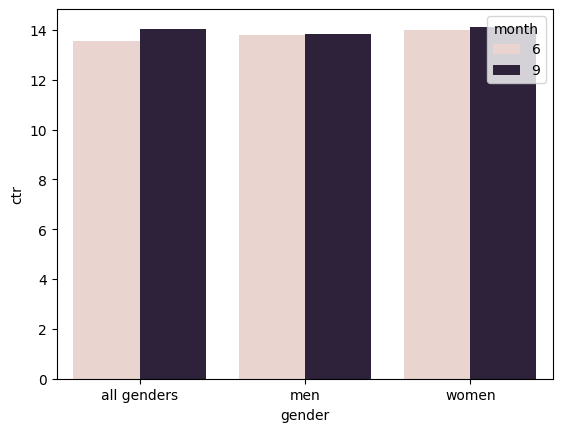

In [48]:
sns.barplot(x='gender', y='ctr', hue='month', data=gender_month)
plt.show(fig)

In [49]:
# here again comparing months and interest audience instead of gender.

audience_month = marketing_df[(marketing_df['month'] == 6) | (marketing_df['month'] == 9)].groupby(["month","customer_segment"]).agg({"ctr": "mean", "campaign_id":"count"}).reset_index()
audience_month

,month,customer_segment,ctr,campaign_id
0,6,Fashionistas,13.647397,3285
1,6,Foodies,13.973235,3243
2,6,Health & Wellness,14.147689,3288
3,6,Outdoor Adventurers,13.682111,3326
4,6,Tech Enthusiasts,13.719709,3298
5,9,Fashionistas,14.085723,3355
6,9,Foodies,14.076281,3259
7,9,Health & Wellness,13.754222,3209
8,9,Outdoor Adventurers,13.822799,3294
9,9,Tech Enthusiasts,14.258411,3323


Amount of campaigns per customer segment is more or less the same (no disbalance) but the CTR behavior is different: Fashionistas and Tech Enthusiasts clicked 0,5% more in September than in June, Foodies and Outdoor increased slightly, only Health & W. decreased slightly.

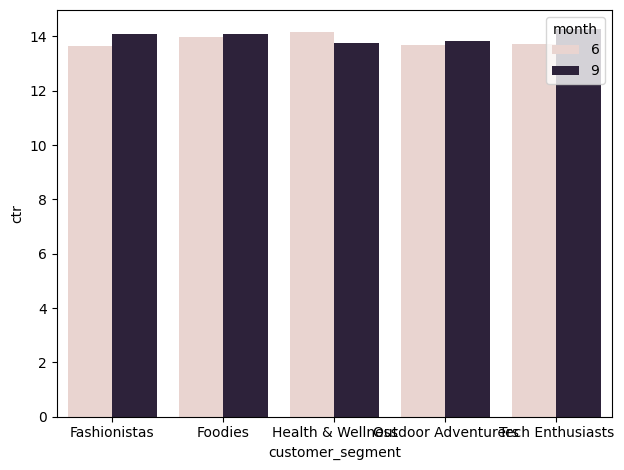

In [50]:
sns.barplot(x='customer_segment', y='ctr', hue='month', data=audience_month)
plt.tight_layout()
plt.show(fig)

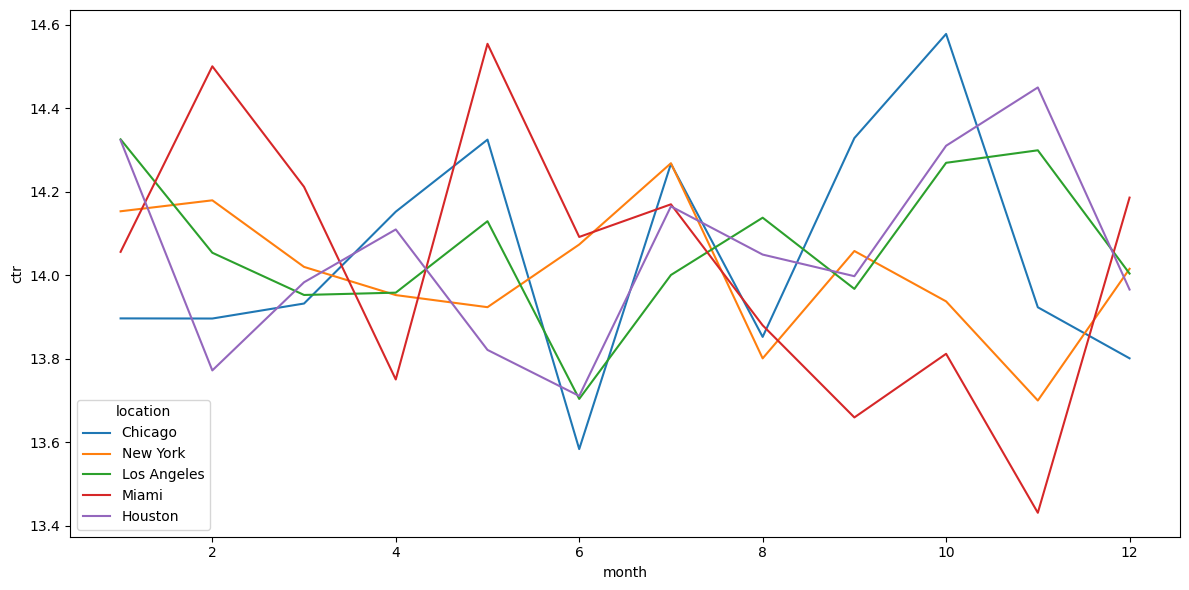

In [51]:
# Moving our focus on locations: CTR decreases in June across all locations, and the trend increases again in September. Chicago peaks with highest
# absolute CTR in October, Houston and LA follow along. Miami and New York decrease in the same period, so it is advisable for clients to focus their 
# local marketing activies with this seasonal trend in mind.

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=marketing_df, x="month", y="ctr", hue="location",errorbar=None, ax=ax)
plt.tight_layout()
plt.show()


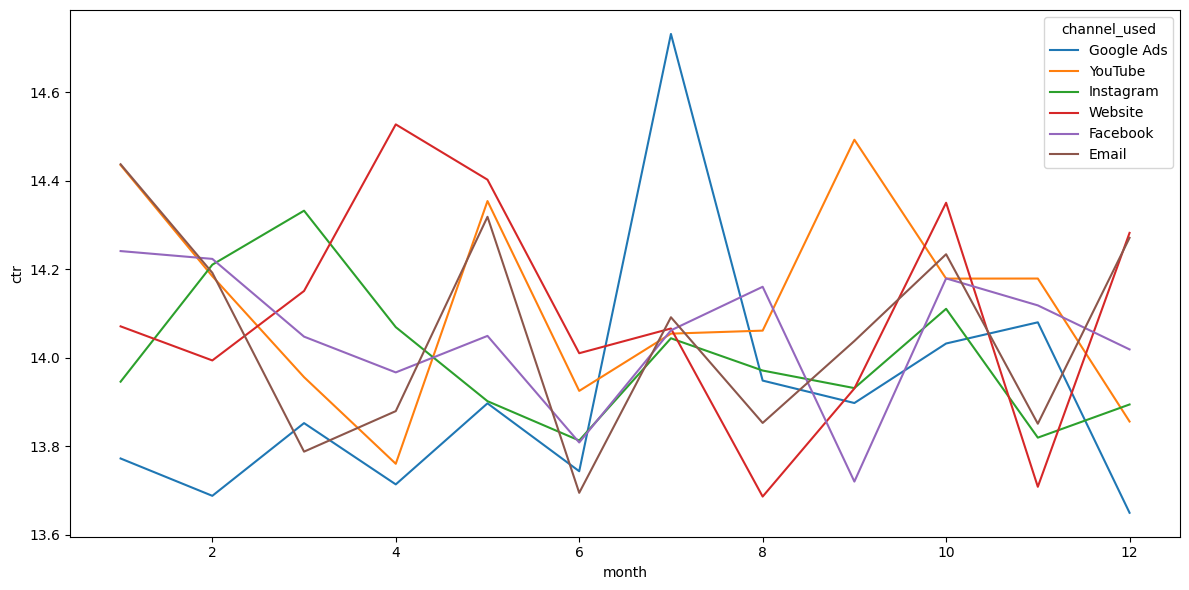

In [53]:
# analyze trend on channel: again, June records a dip - Google Ads are strongest in July, dips in December (probably because of high competition 
# high season in Q4 (higher demand for Google traffic, less quality). Website and Email (channels with more direct connection to brand) increase 
# in effectiveness in December, whereas paid channels (Google, FB and Insta) decrease, likely due to user dispersion - these channels might suffer from more advertising pressure 

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=marketing_df, x="month", y="ctr", hue="channel_used",errorbar=None, ax=ax)
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

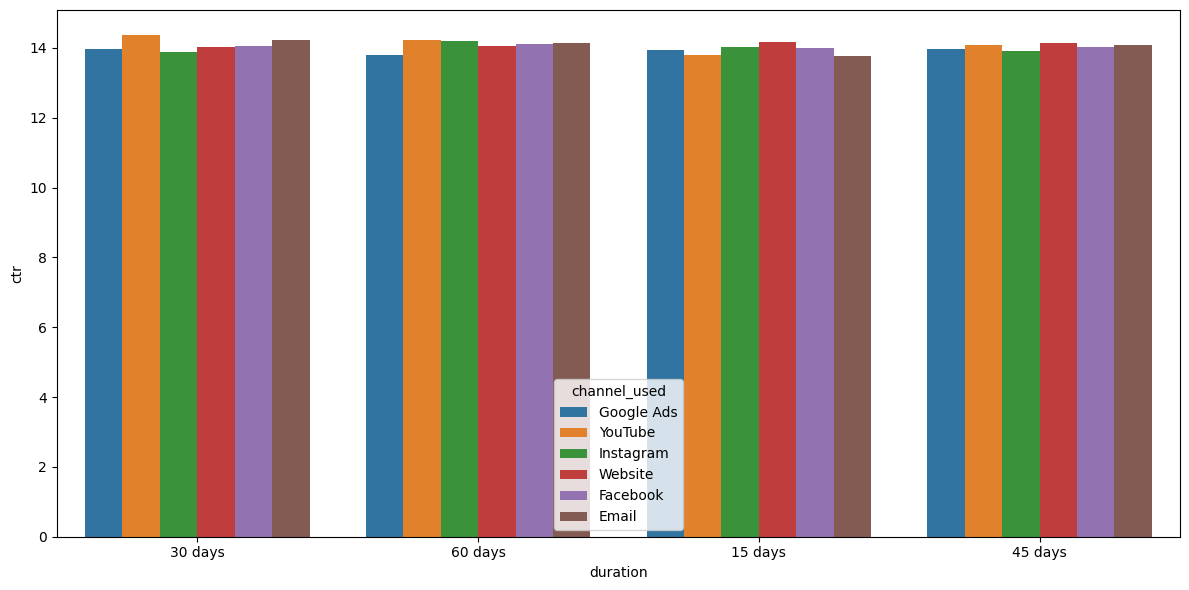

In [55]:
# plotting duration by channel on CTR to find which channel drives highest performance by flight time (aka duration)

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=marketing_df, x="duration", y="ctr", hue="channel_used",errorbar=None, ax=ax)
plt.tight_layout()
plt.show()

In [58]:
marketing_df.groupby(["duration","channel_used"]).agg({"ctr":"mean"}).reset_index().sort_values(by="ctr", ascending=False)

,duration,channel_used,ctr
11,30 days,YouTube,14.368107
23,60 days,YouTube,14.232109
6,30 days,Email,14.226947
21,60 days,Instagram,14.197111
4,15 days,Website,14.175212
18,60 days,Email,14.147982
16,45 days,Website,14.137951
19,60 days,Facebook,14.119399
12,45 days,Email,14.085714
17,45 days,YouTube,14.071085


In [56]:
#saving dataframe + additional columns (CTR etc) to local PC

#marketing_df.to_csv('C:\\Users\\deghe\\Documents\\Ironhack\\Week_5\\Mid_bootcamp_project\\mid_project\\data\\cleaned\\cleaned_marketing_df_after_EDA.csv',index=False)

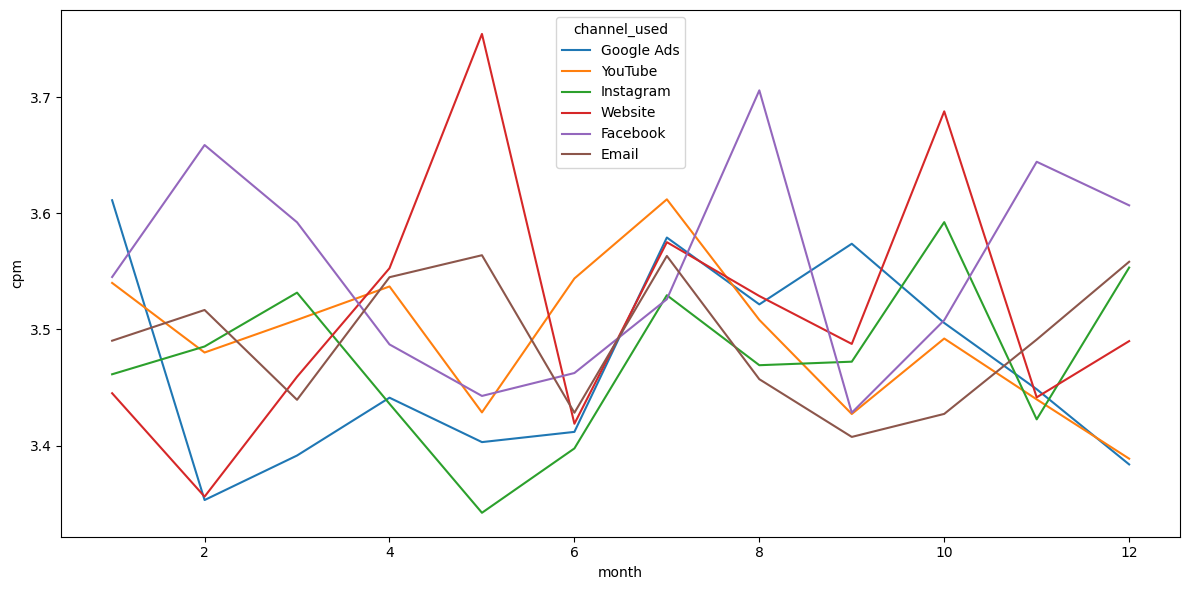

In [79]:
# plotting CPM fluctuation by channel and month

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=marketing_df, x="month", y="cpm", hue="channel_used",errorbar=None, ax=ax)
plt.tight_layout()
plt.show()


In [65]:
# checking if impression distribution is even

marketing_df.groupby(["month"]).agg({"impressions":"sum", "cpm":"mean"}).reset_index().sort_values(by="month")

,month,impressions,cpm
0,1,92956072,3.515011
1,2,84493850,3.473735
2,3,93804488,3.486790
3,4,90677348,3.499498
4,5,93384968,3.488358
5,6,91119478,3.443689
6,7,93060793,3.564341
7,8,93801223,3.532074
8,9,90658302,3.466494
9,10,93264009,3.536039
